In [56]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.math import confusion_matrix
from tensorflow.keras.datasets import mnist
print('dataset loaded')

dataset loaded


In [58]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [60]:
x_train.shape

(60000, 28, 28)

In [62]:
x_test.shape

(10000, 28, 28)

In [64]:
y_train.shape

(60000,)

In [66]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

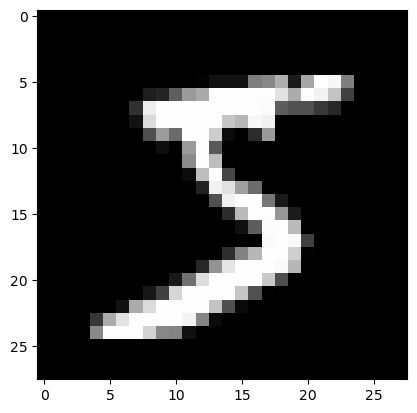

In [68]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

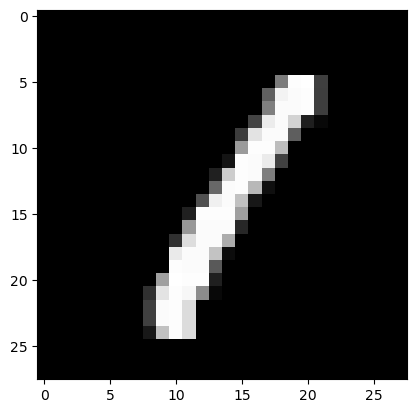

In [88]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap = 'gray')
plt.show()

In [70]:
x_train=x_train/255.
x_test=x_test/255.

In [78]:
from tensorflow.keras.utils import to_categorical

In [80]:
num_classes = 10

In [82]:
y_train= to_categorical(y_train,num_classes)
y_test= to_categorical(y_test,num_classes)

In [84]:
y_train.shape

(60000, 10)

In [86]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [96]:
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

In [98]:
x_train.shape

(60000, 784)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('imported')

imported


In [142]:
model=keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape = (784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu')
])
model.add(Dense(10, activation='softmax'))

In [144]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model is compiled')

model is compiled


In [148]:
batch_size = 128
epochs = 5

In [152]:
60000/128

468.75

In [150]:
history= model.fit(x_train,y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7790 - loss: 0.7216 - val_accuracy: 0.9506 - val_loss: 0.1651
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9540 - loss: 0.1563 - val_accuracy: 0.9620 - val_loss: 0.1222
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.1081 - val_accuracy: 0.9688 - val_loss: 0.0962
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.0802 - val_accuracy: 0.9728 - val_loss: 0.0933
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0643 - val_accuracy: 0.9727 - val_loss: 0.0902


In [154]:
score=model.evaluate(x_test,y_test)
print('a

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1015


In [158]:
score=model.evaluate(x_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0532
